### show the usage of planck2018

In [4]:
import getdist.plots as gplot
# example of code see: 
#1 https://cosmologist.info/cosmomc/readme_python.html
#2 https://cosmologist.info/cosmomc/readme_planck.html
#3 https://cosmologist.info/cosmomc/readme_gui.html

# Chains dir download from link: 
#1 https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Cosmological_Parameters#File_formats
#2 https://www.cosmos.esa.int/web/planck/pla
# Need to add the absolute location
chain_dir=r'D:/桌面/eROSTA/survey/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3/'
g = gplot.getSinglePlotter(chain_dir=chain_dir)
samples = g.sample_analyser.samples_for_root('base_plikHM_TTTEEE_lowl_lowE_lensing')
p = samples.getParams()

derived = p.sigma8 * p.omegam ** 0.6

print('mean = %s, err = %s'%(samples.mean(derived), samples.std(derived)))
print('95%% limits: %s'%samples.twoTailLimits(derived, 0.95))
print(samples.weights)

D:\桌面\eROSTA\survey\COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3\base\plikHM_TTTEEE_lowl_lowE_lensing\base_plikHM_TTTEEE_lowl_lowE_lensing_1.txt
D:\桌面\eROSTA\survey\COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3\base\plikHM_TTTEEE_lowl_lowE_lensing\base_plikHM_TTTEEE_lowl_lowE_lensing_2.txt
D:\桌面\eROSTA\survey\COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3\base\plikHM_TTTEEE_lowl_lowE_lensing\base_plikHM_TTTEEE_lowl_lowE_lensing_3.txt
D:\桌面\eROSTA\survey\COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3\base\plikHM_TTTEEE_lowl_lowE_lensing\base_plikHM_TTTEEE_lowl_lowE_lensing_4.txt
Removed no burn in
mean = 0.4057909162873801, err = 0.0071091631980970274
95% limits: [0.39170747 0.41996794]
[1. 1. 2. ... 1. 1. 2.]


<Figure size 600x450 with 0 Axes>

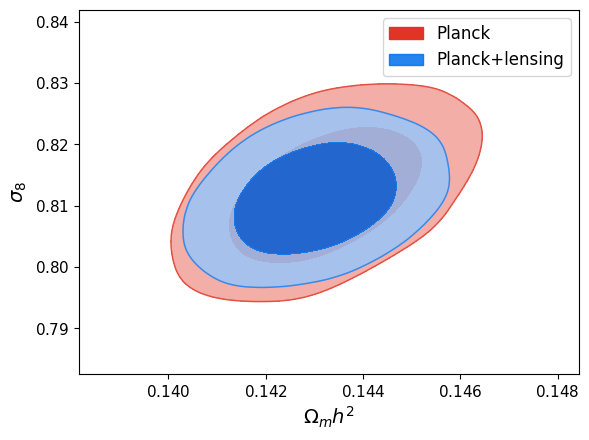

In [7]:
from getdist import plots

#chain_dir = 'base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_1.txt'
#analysis_settings = 'config/config.ini'

g = plots.getSinglePlotter(chain_dir=chain_dir)
roots = ['base_plikHM_TTTEEE_lowl_lowE', 'base_plikHM_TTTEEE_lowl_lowE_lensing']
g.plot_2d(roots, 'omegamh2', 'sigma8', filled=True)
g.plot_2d(roots, 'omegamh2', 'sigma8', filled=True)
g.add_legend(['Planck', 'Planck+lensing'], legend_loc='upper right')
#g.export('mnu_nnu.png')

### extract DES_Y3 chains

In [27]:
import pandas as pd
# paper
# https://arxiv.org/abs/2305.17173
# Chains download from link: 
# https://des.ncsa.illinois.edu/releases/y3a2/Y3key-joint-des-kids
# example
# https://github.com/joezuntz/cosmosis-standard-library/blob/main/examples/des-y3_and_kids-1000.ini?utm_source=chatgpt.com
input_file = 'DES_Y3/chain_desy3_and_kids1000_hybrid_analysis.txt'   # 修改为你的输入文件名
output_file = 'DES_Y3/chain_desy3_and_kids1000_hybrid_analysis.csv'  # 输出csv文件名

def extract_chain(input_file, output_file):
    with open(input_file, 'r') as fin, open(output_file, 'w') as fout:
        header_written = False
        for line in fin:
            line = line.strip()
            if not line:
                continue
            if line.startswith('#'):
                # 处理注释行：去掉#，作为变量名写入csv，只写一次
                if not header_written:
                    header = line.lstrip('#').strip().replace('\t', ',')
                    fout.write(header + '\n')
                    header_written = True
                continue
            else:
                # 普通数据行，替换空白符为逗号写入csv
                csv_line = ','.join(line.split())
                fout.write(csv_line + '\n')
extract_chain(input_file, output_file)

In [28]:

output_table = pd.read_csv(output_file)
df_new = output_table[['COSMOLOGICAL_PARAMETERS--SIGMA_8', 'COSMOLOGICAL_PARAMETERS--OMEGA_M', 
                       'cosmological_parameters--h0','cosmological_parameters--omch2',
                       'cosmological_parameters--ombh2', 'weight']].copy()
# rename
df_new.rename(columns={
    'COSMOLOGICAL_PARAMETERS--SIGMA_8': 'sigma_8',
    'COSMOLOGICAL_PARAMETERS--OMEGA_M': 'omega_m',
    'cosmological_parameters--h0': 'h0',
    'cosmological_parameters--omch2': 'omegach2',
    'cosmological_parameters--ombh2': 'omegabh2',
    'weight': 'weights'}, inplace=True)
df_new['omegamh2'] = df_new['omegach2'] + df_new['omegabh2']
df_new.to_csv('DES_Y3_kids1000.csv', index=False)

Removed no burn in


<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\O'
<>:13: SyntaxWarning: invalid escape sequence '\s'
C:\Users\q9775\AppData\Local\Temp\ipykernel_49088\1998975238.py:13: SyntaxWarning: invalid escape sequence '\O'
  names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']
C:\Users\q9775\AppData\Local\Temp\ipykernel_49088\1998975238.py:13: SyntaxWarning: invalid escape sequence '\s'
  names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']


((np.float64(0.13699234682828226), np.float64(0.4845035184199107)),
 (np.float64(0.5582385400394438), np.float64(1.11781242792868)))

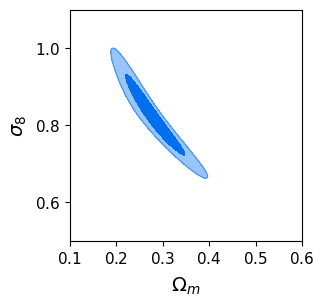

<Figure size 600x450 with 0 Axes>

In [29]:
import numpy as np
from getdist import plots, MCSamples
import matplotlib.pyplot as plt

def read_samples(fanme, col_names, names, labels, is_catalog=False):
    catalog = pd.read_csv(fanme)
    var1, var2 = catalog[col_names[0]].values, catalog[col_names[1]].values
    weights = catalog[col_names[2]].values
    samples = MCSamples(samples=[var1,var2], weights=weights, names=names, labels=labels, settings={'smooth_scale_2D':0.5})
    return samples

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']
samples_DES_Y3 = read_samples('./DES_Y3_kids1000.csv', ['omega_m', 'sigma_8', 'weights'], names, labels)
samples_list = [samples_DES_Y3]
lims=[0.1, 0.6, 0.5, 1.1]
g = plots.get_single_plotter()
g.plot_2d(samples_list, names, ax=ax, filled=True, lims=lims)

### KiDS-1000+3×2pt

In [30]:
import pandas as pd
input_file = 'KiDS1000_3x2pt_fiducial_chains/cosmology/samples_multinest_blindC_EE_nE_w.txt'   # 修改为你的输入文件名
output_file = 'KiDS1000_3x2pt_fiducial_chains/samples_multinest_blindC_EE_nE_w.csv'  # 输出csv文件名

def extract_chain(input_file, output_file):
    with open(input_file, 'r') as fin, open(output_file, 'w') as fout:
        header_written = False
        for line in fin:
            line = line.strip()
            if not line:
                continue
            if line.startswith('#'):
                # 处理注释行：去掉#，作为变量名写入csv，只写一次
                if not header_written:
                    header = line.lstrip('#').strip().replace('\t', ',')
                    fout.write(header + '\n')
                    header_written = True
                continue
            else:
                # 普通数据行，替换空白符为逗号写入csv
                csv_line = ','.join(line.split())
                fout.write(csv_line + '\n')
extract_chain(input_file, output_file)

In [31]:
output_table = pd.read_csv(output_file)
df_new = output_table[['COSMOLOGICAL_PARAMETERS--SIGMA_8', 'COSMOLOGICAL_PARAMETERS--OMEGA_M', 
                       'cosmological_parameters--h0','cosmological_parameters--omch2',
                       'cosmological_parameters--ombh2', 'weight']].copy()
# rename
df_new.rename(columns={
    'COSMOLOGICAL_PARAMETERS--SIGMA_8': 'sigma_8',
    'COSMOLOGICAL_PARAMETERS--OMEGA_M': 'omega_m',
    'cosmological_parameters--h0': 'h0',
    'cosmological_parameters--omch2': 'omegach2',
    'cosmological_parameters--ombh2': 'omegabh2',
    'weight': 'weights'}, inplace=True)
df_new['omegamh2'] = df_new['omegach2'] + df_new['omegabh2']
df_new.to_csv('kids1000_3xpt.csv', index=False)

Removed no burn in


<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\k'
<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:13: SyntaxWarning: invalid escape sequence '\k'
C:\Users\q9775\AppData\Local\Temp\ipykernel_49088\514878191.py:12: SyntaxWarning: invalid escape sequence '\O'
  names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']
C:\Users\q9775\AppData\Local\Temp\ipykernel_49088\514878191.py:12: SyntaxWarning: invalid escape sequence '\s'
  names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']
C:\Users\q9775\AppData\Local\Temp\ipykernel_49088\514878191.py:13: SyntaxWarning: invalid escape sequence '\k'
  samples_kids1000_3xpt = read_samples('.\kids1000_3xpt.csv', ['omega_m', 'sigma_8', 'weights'], names, labels)


((np.float64(0.25779059990175085), np.float64(0.35340352278238124)),
 (np.float64(0.6758893084034867), np.float64(0.8458094282715891)))

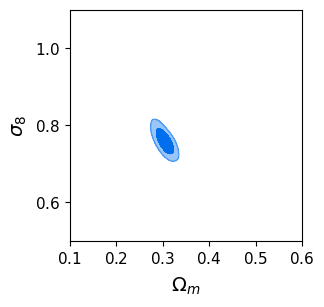

<Figure size 600x450 with 0 Axes>

In [32]:
import numpy as np
from getdist import plots, MCSamples
import matplotlib.pyplot as plt
def read_samples(fanme, col_names, names, labels, is_catalog=False):
    catalog = pd.read_csv(fanme)
    var1, var2 = catalog[col_names[0]].values, catalog[col_names[1]].values
    weights = catalog[col_names[2]].values
    samples = MCSamples(samples=[var1,var2], weights=weights, names=names, labels=labels, settings={'smooth_scale_2D':0.5})
    return samples

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
names,labels = ['omega_m','sigma_8'],['\Omega_m','\sigma_8']
samples_kids1000_3xpt = read_samples('.\kids1000_3xpt.csv', ['omega_m', 'sigma_8', 'weights'], names, labels)
samples_list = [samples_kids1000_3xpt]
lims=[0.1, 0.6, 0.5, 1.1]
g = plots.get_single_plotter()
g.plot_2d(samples_list, names, ax=ax, filled=True, lims=lims)